In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,clear_output
from aakashLib import *
import glob
%matplotlib inline

/usr/local/lib64/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.models import load_model


In [1]:
trainPM10 = pd.read_csv("Test Train Data/trainPM10.csv",parse_dates=["Time"])
testPM10 = pd.read_csv("Test Train Data/testPM10.csv",parse_dates=["Time"])
trainPM10["year"] = trainPM10["Time"].dt.year
testPM10["year"] = testPM10["Time"].dt.year

trainPM10.set_index("Time",inplace=True)
testPM10.set_index("Time", inplace=True)
# trainPM25 = pd.read_csv("Test Train Data/trainPM25.csv")
# testPM25 = pd.read_csv("Test Train Data/testPM25.csv")

NameError: name 'pd' is not defined

In [152]:
testPM10.shape

(14608, 50)

In [153]:
trainPM10 = trainPM10.drop(trainPM10.columns[:9],axis=1)
testPM10 = testPM10.drop(testPM10.columns[:9],axis=1)

In [ ]:
# trainPM10["".hist()

In [154]:
X_train = trainPM10.drop("PM10 IHBAS ANAND ND",axis=1).as_matrix()
y_train = trainPM10["PM10 IHBAS ANAND ND"].as_matrix()
X_test = testPM10.drop("PM10 IHBAS ANAND ND",axis=1).as_matrix()
y_test = testPM10["PM10 IHBAS ANAND ND"]

In [155]:
y_test = np.log1p(y_test)
y_train = np.log1p(y_train)

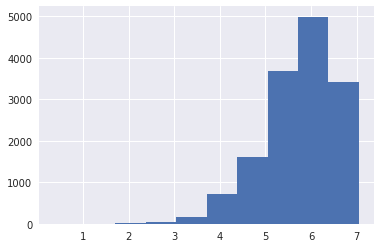

In [156]:
y_test.hist()

In [157]:
y_train.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [158]:
showSkew(trainPM10)

AnandIHBAS 29April (CH4)           1.030178
AnandIHBAS 29April (CO)            1.989957
AnandIHBAS 29April (NH3)           1.262125
AnandIHBAS 29April (NMHC)          1.199635
AnandIHBAS 29April (NO)            1.249547
AnandIHBAS 29April (NO2)           1.944792
AnandIHBAS 29April (NOx)           1.273883
AnandIHBAS 29April (PM10)          2.310528
AnandIHBAS 29April (PM2.5)         0.494350
AnandIHBAS 29April (RH)            0.190608
AnandIHBAS 29April (SO2)           1.367713
AnandIHBAS 29April (THC)           1.126263
AnandIHBAS 29April (Temp)          1.208809
ShadipurPunjabiBagh (Ben)          0.063266
ShadipurPunjabiBagh (CO)           1.357994
ShadipurPunjabiBagh (MP-Xylene)    0.576807
ShadipurPunjabiBagh (NO)           0.822264
ShadipurPunjabiBagh (NO2)          1.552160
ShadipurPunjabiBagh (NOx)          1.714405
ShadipurPunjabiBagh (O-Xylene)     0.472695
ShadipurPunjabiBagh (O3)           0.645695
ShadipurPunjabiBagh (RH)           1.057000
ShadipurPunjabiBagh (SO2)       

In [99]:
for yr in range(2011,2014):
    display(showCorr(trainPM10["{}".format(yr):"2014"],"PM10 IHBAS ANAND ND"))
    print 
    nx = raw_input("Continue: ")
    clear_output()
    

In [98]:
showCorr(testPM10,"PM10 IHBAS ANAND ND")

List the numerical features decendingly by their correlation with:PM10 IHBAS ANAND ND
AnandIHBAS 29April (Temp): 	0.252977279693
CivilMandirITO (BEN): 	0.225454720545
CivilMandirITO (RH): 	-0.213166650147
AnandIHBAS 29April (RH): 	-0.211064080403
ShadipurPunjabiBagh (SO2): 	-0.183457715651
month: 	0.183244543314
CivilMandirITO (WD): 	0.173748343218
ShadipurPunjabiBagh (RH): 	-0.1715901458
ShadipurPunjabiBagh (Ben): 	-0.161989209275
AnandIHBAS 29April (NO): 	0.158517500736
CivilMandirITO (TOL): 	-0.129115846871
CivilMandirITO (PM10): 	-0.125071267308
ShadipurPunjabiBagh (O3): 	-0.11543762845
AnandIHBAS 29April (NOx): 	0.0832224277496
ShadipurPunjabiBagh (NO): 	0.0711917597495
ShadipurPunjabiBagh (MP-Xylene): 	-0.0703490261396
AnandIHBAS 29April (PM10): 	0.0674886953797
AnandIHBAS 29April (PM2.5): 	-0.0667541112075
hour: 	0.063767194079
day: 	0.0630216326162
CivilMandirITO (PM2.5): 	-0.0625194836936
CivilMandirITO (NO): 	-0.062140124369
ShadipurPunjabiBagh (O-Xylene): 	-0.0589515750428
C

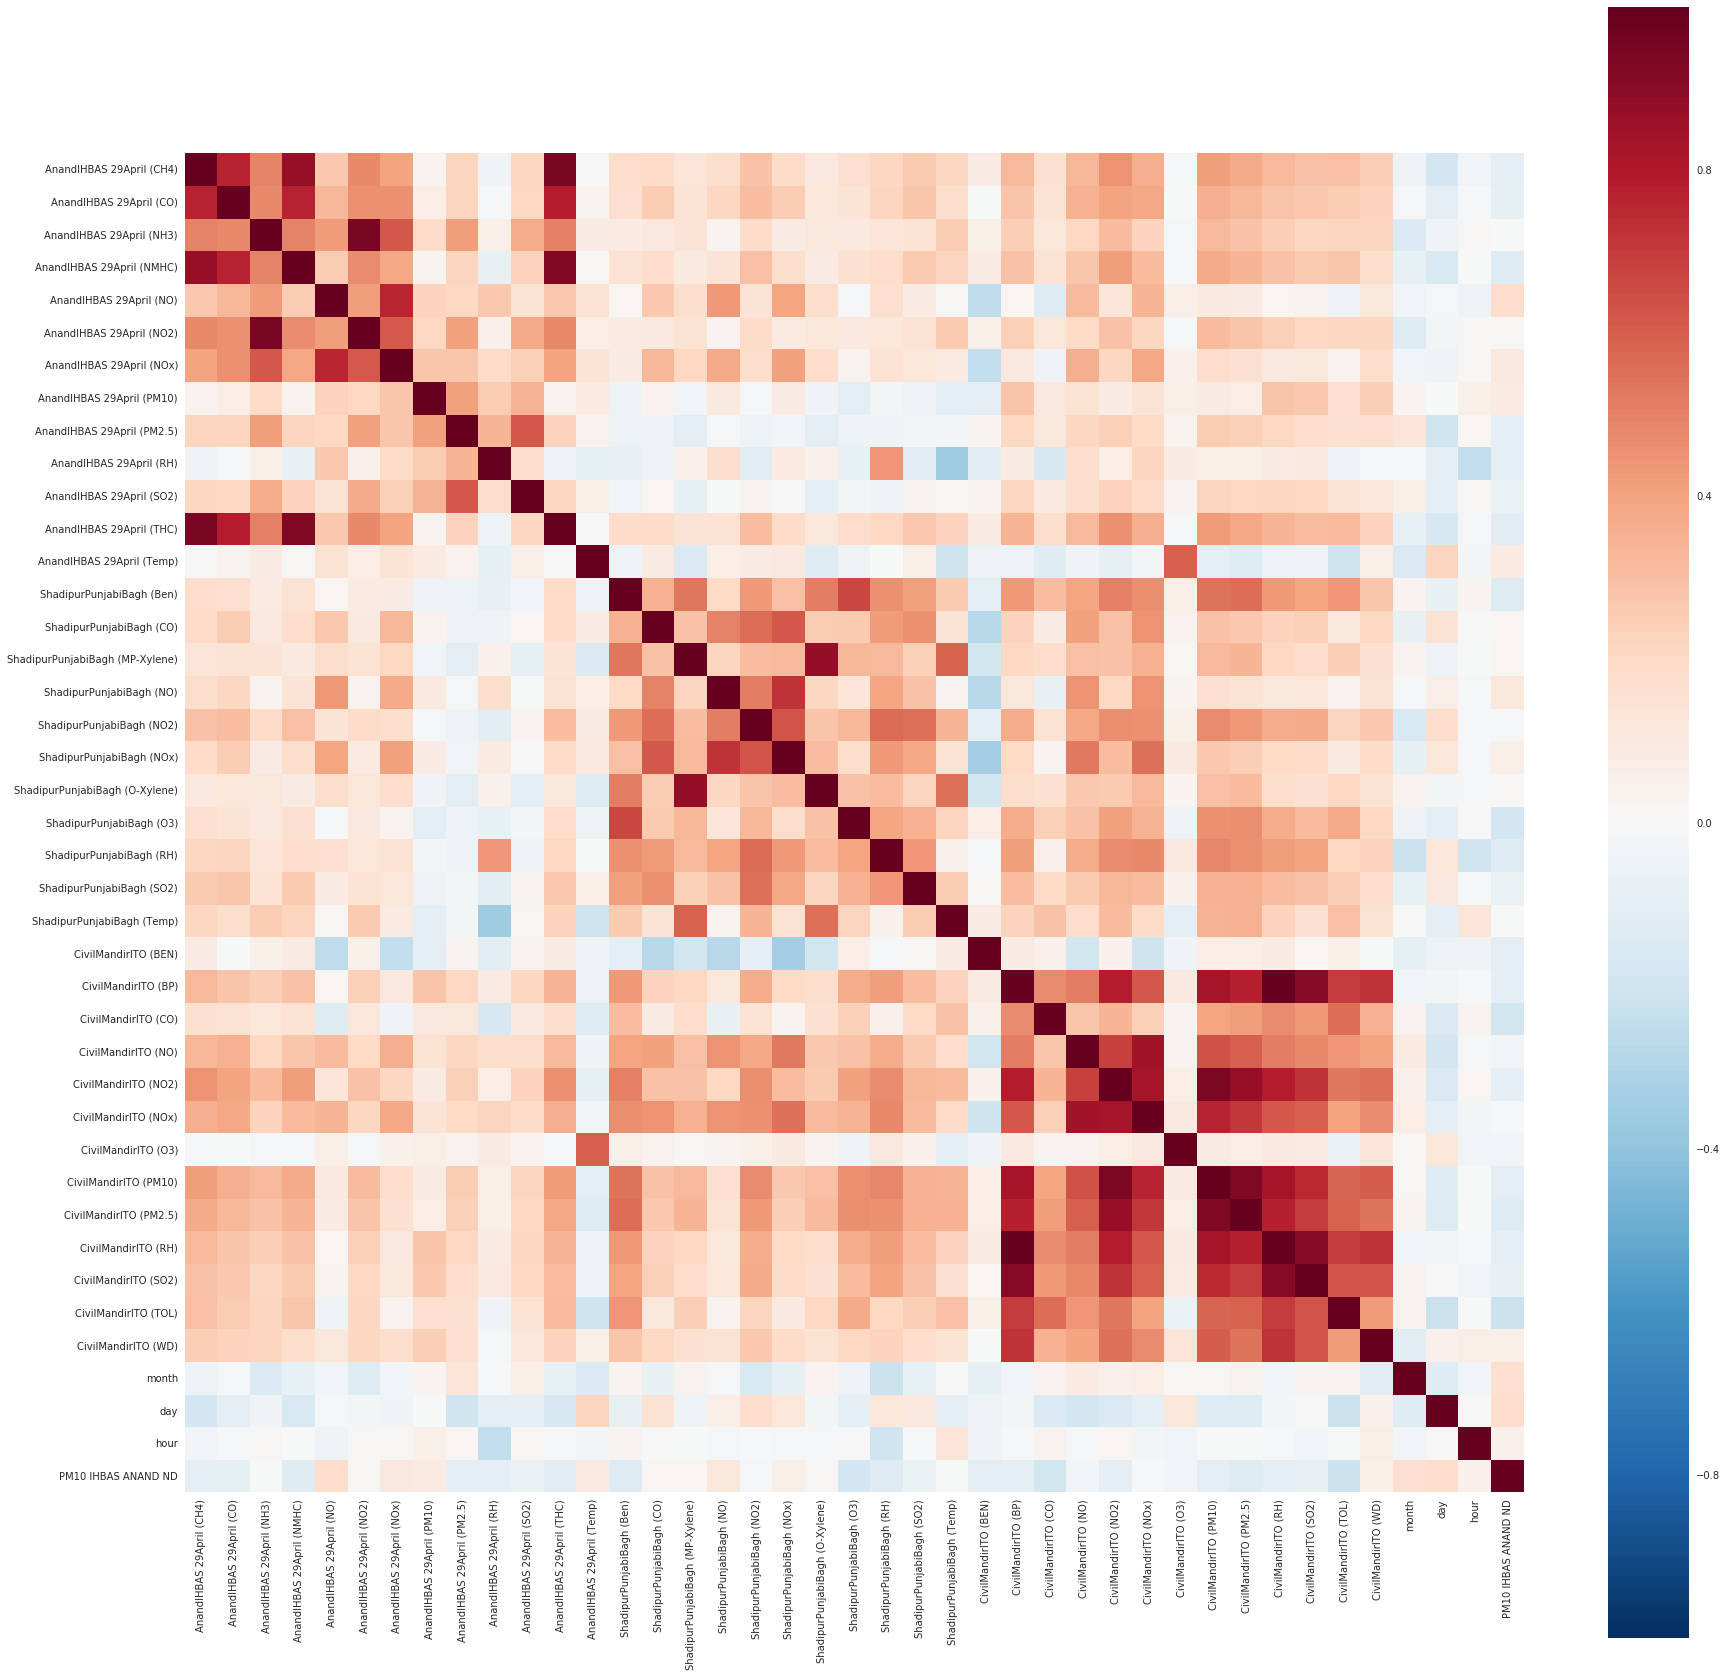

In [74]:
drawCorr(testPM10)

In [132]:
y_train.shape

(40876,)

In [133]:
X_train.shape

(29364, 49)

In [149]:
np.random.seed(7)
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(1))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Densee(1024))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))
# model.add(Dense(179))
# model.add(Activation('softmax'))

model.compile(loss='mean_absolute_error',optimizer='rmsprop')
# metrics=['accuracy'])

In [150]:
model.fit(batch_size=32,nb_epoch=200,shuffle=True,validation_data=(X_test,y_test),x=X_train,y=y_train)

Train on 29364 samples, validate on 14608 samples
Epoch 1/200
29364/29364 [==============================] - 3s - loss: 0.6099 - val_loss: 0.6965

KeyboardInterrupt: 

In [35]:
y_test

array([ 461.83,  432.33,  280.67, ...,  312.67,  323.67,  274.67])

In [37]:
y_train

array([ 253.9 ,  223.84,  195.21, ...,  443.  ,  443.  ,  190.33])

In [38]:
X_train

array([[  1.92299385e-03,   5.53932961e-03,   1.97359907e-04, ...,
          8.33333333e-02,   3.22580645e-02,   0.00000000e+00],
       [  1.44315920e-03,   5.58531462e-03,   1.00000000e+00, ...,
          8.33333333e-02,   3.22580645e-02,   4.34782609e-02],
       [  1.06301319e-03,   6.09984962e-03,   1.00000000e+00, ...,
          8.33333333e-02,   3.22580645e-02,   8.69565217e-02],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          7.50000000e-01,   9.67741935e-02,   3.47826087e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          7.50000000e-01,   9.67741935e-02,   3.91304348e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          7.50000000e-01,   1.29032258e-01,   6.95652174e-01]])

In [39]:
X_test

array([[ 1.        ,  1.        ,  1.        , ...,  0.83333333,
         0.03225806,  0.        ],
       [ 1.        ,  1.        ,  1.        , ...,  0.83333333,
         0.03225806,  0.04347826],
       [ 1.        ,  1.        ,  1.        , ...,  0.83333333,
         0.03225806,  0.08695652],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.09677419,  0.91304348],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.09677419,  0.95652174],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.09677419,  1.        ]])